In [35]:
%matplotlib notebook

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("../flight-delays/flights.csv")
df["total_delay"] = df["DEPARTURE_DELAY"] + df["ARRIVAL_DELAY"]
df.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,total_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-33.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-17.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-14.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-22.0


In [38]:
airport_delay = df[["ORIGIN_AIRPORT", "DEPARTURE_DELAY"]]
airport_delay

,ORIGIN_AIRPORT,DEPARTURE_DELAY
0,ANC,-11.0
1,LAX,-8.0
2,SFO,-2.0
3,LAX,-5.0
4,SEA,-1.0
5,SFO,-5.0
6,LAS,-6.0
7,LAX,14.0
8,SFO,-11.0
9,LAS,3.0


In [39]:
df_airport_total = airport_delay["ORIGIN_AIRPORT"].value_counts()

In [40]:
df_airport_clean = airport_delay[airport_delay['DEPARTURE_DELAY'] >= 15.0]
airport_count = df_airport_clean["ORIGIN_AIRPORT"].value_counts()

In [41]:
airport_count = pd.DataFrame(airport_count)
airport_count["TOTAL DEPARTING FLIGHTS"] = df_airport_total
airport_count["Delayed %"] = airport_count["ORIGIN_AIRPORT"]/airport_count["TOTAL DEPARTING FLIGHTS"]
airport_count = airport_count[airport_count["TOTAL DEPARTING FLIGHTS"] >= 10000]
airport_count = airport_count.nlargest(10,"Delayed %")
airport_count

,ORIGIN_AIRPORT,TOTAL DEPARTING FLIGHTS,Delayed %
MDW,19693,80886,0.243466
BWI,20873,86079,0.242487
ORD,67810,285884,0.237194
DAL,14050,59699,0.235347
HOU,12183,52042,0.234099
EWR,23552,101772,0.231419
MIA,16022,69341,0.231061
DEN,44426,196055,0.226600
PBI,4967,22573,0.220042
LGA,21529,99605,0.216144


<IPython.core.display.Javascript object>


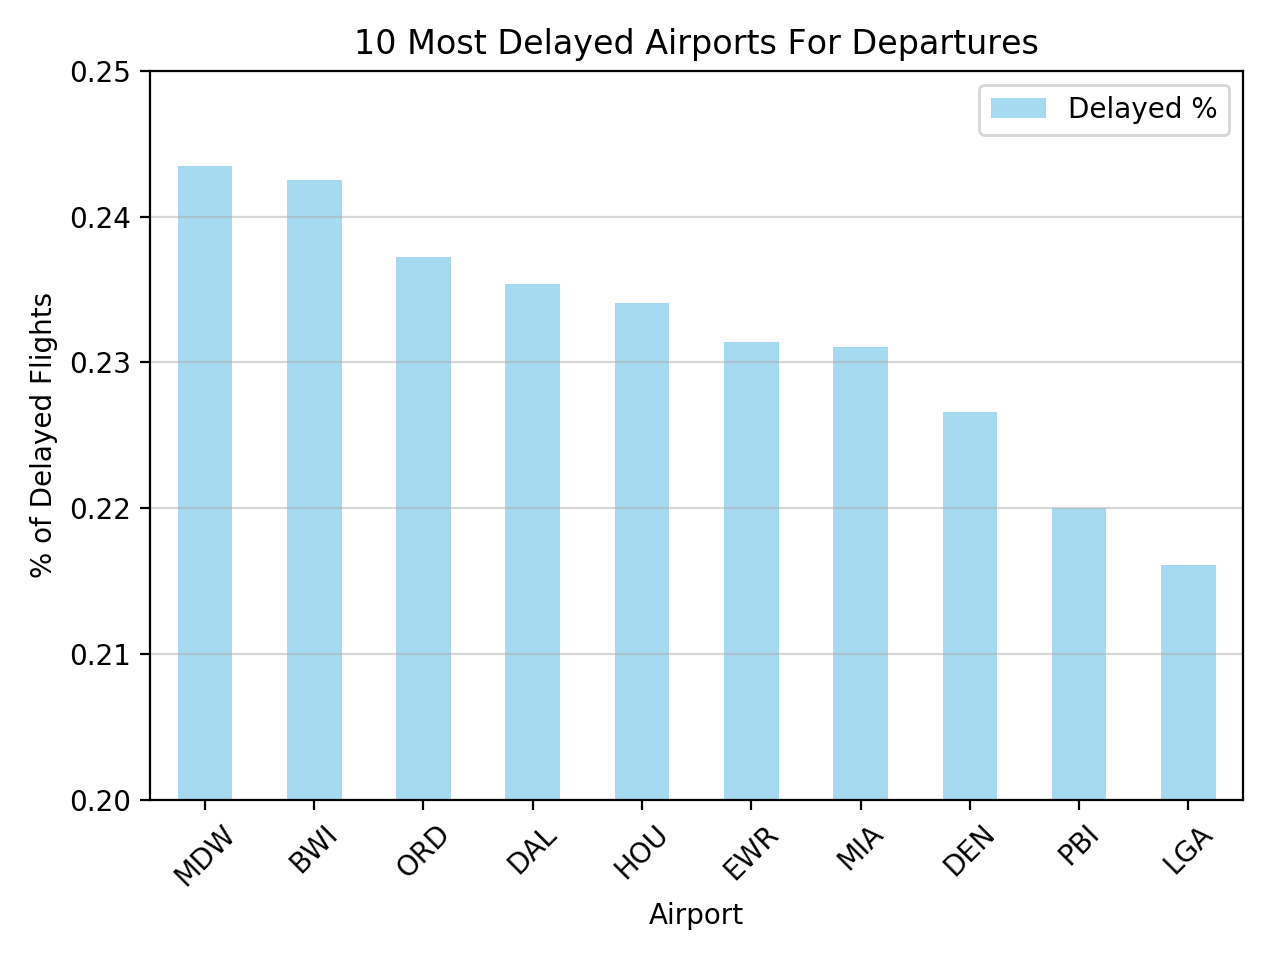

In [48]:
airport_count.plot(y="Delayed %", kind="bar", facecolor="skyblue", alpha=0.75, align="center", rot=45)
plt.title("10 Most Delayed Airports For Departures")
plt.xlabel("Airport")
plt.ylabel("% of Delayed Flights")
plt.tight_layout()
plt.ylim(ymin=0.2, ymax=0.25)
plt.grid(axis='y', alpha =0.5)
plt.show()
plt.savefig("OriginAirportDelays")

In [43]:
airport_delay_2 = df[["DESTINATION_AIRPORT", "ARRIVAL_DELAY"]]
airport_delay_2 

,DESTINATION_AIRPORT,ARRIVAL_DELAY
0,SEA,-22.0
1,PBI,-9.0
2,CLT,5.0
3,MIA,-9.0
4,ANC,-21.0
5,MSP,8.0
6,MSP,-17.0
7,CLT,-10.0
8,DFW,-13.0
9,ATL,-15.0


In [44]:
df_airport_total_2 = airport_delay_2["DESTINATION_AIRPORT"].value_counts()

In [45]:
df_airport_clean_2 = airport_delay_2[airport_delay_2["ARRIVAL_DELAY"] >= 15.0]
airport_count_2 = df_airport_clean_2["DESTINATION_AIRPORT"].value_counts()

In [46]:
airport_count_2 = pd.DataFrame(airport_count_2)
airport_count_2["TOTAL ARRIVAL FLIGHTS"] = df_airport_total_2
airport_count_2["Delayed %"] = airport_count_2["DESTINATION_AIRPORT"]/airport_count_2["TOTAL ARRIVAL FLIGHTS"]
airport_count_2 = airport_count_2[airport_count_2["TOTAL ARRIVAL FLIGHTS"] >= 10000]
airport_count_2 = airport_count_2.nlargest(10,"Delayed %")
airport_count_2

,DESTINATION_AIRPORT,TOTAL ARRIVAL FLIGHTS,Delayed %
LGA,24819,99581,0.249234
PBI,5142,22574,0.227784
SJU,5521,24653,0.223948
LAX,43453,194696,0.223184
SFO,32984,147966,0.222916
ELP,2602,11976,0.217268
EWR,22051,101830,0.216547
JFK,20294,93809,0.216333
OKC,3471,16147,0.214963
LIT,2228,10417,0.213881


<IPython.core.display.Javascript object>


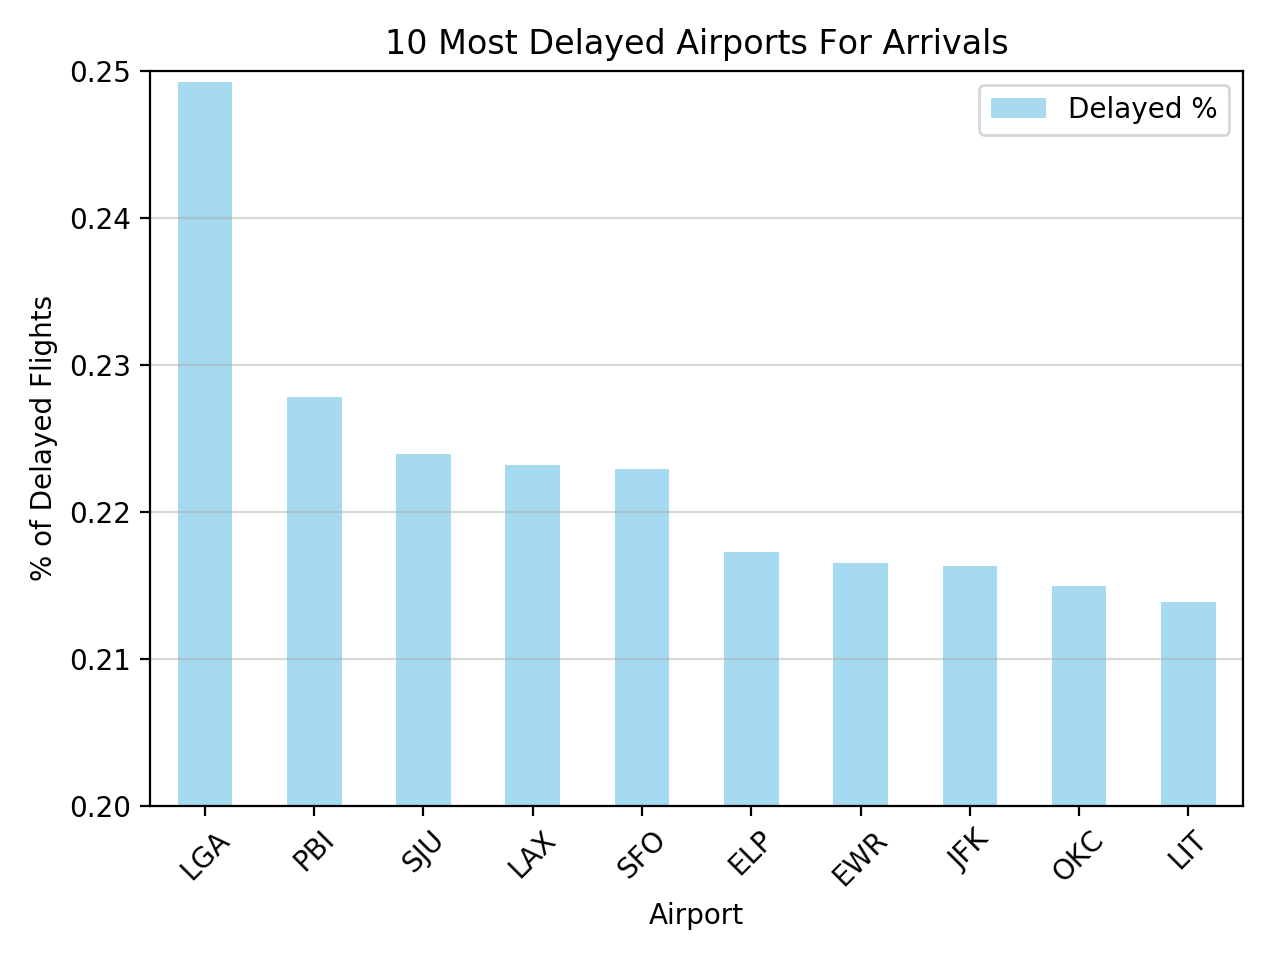

In [55]:
airport_count_2.plot(y="Delayed %", kind="bar", facecolor="skyblue", alpha=0.75, align="center", rot=45)
plt.title("10 Most Delayed Airports For Arrivals")
plt.xlabel("Airport")
plt.ylabel("% of Delayed Flights")
plt.tight_layout()
plt.ylim(ymin=0.2, ymax=0.25)
plt.grid(axis='y', alpha =0.5)
plt.show()
plt.savefig("DestinationAirportDelays")